In [138]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import refresh_ergast

%load_ext autoreload
%autoreload 2
import ergast_loader

In [113]:
sns.set_style('darkgrid')

"""
Team	Color	RGB
Mercedes	#00D2BE	0,210,190
Ferrari	#C00000	192,0,0
Red Bull Racing	#0600EF	6,0,239
Renault	#FFF500	255,245,0
Haas	#787878	120,120,120
Racing Point	#F596C8	245,150,200
Alpha Tauri	#C8C8C8	200,200,200
McLaren	#FF8700	255,135,0
Alfa Romeo Racing	#960000	150,0,0
Williams	#0082FA	0,130,250
"""

team_colors = {
    'mercedes': '#00D2BE',
    'ferrari': '#C00000',
    'red_bull':'#0600EF',
    'renault':'#FFF500',
    'haas':'#787878',
    'racing_point':'#F596C8',
    'alphatauri':'#C8C8C8',
    'mclaren':'#FF8700',
    'alfa':'#960000',
    'williams':'#0082FA',
}

In [141]:
# refresh_ergast.refresh()
ergast = ergast_loader.ErgastLoader('..//data//ergast_data')

In [142]:
ergast.data['results']

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24735,24741,1036,841,51,99,20,16,16,16,0.0,65,\N,\N,47,6,1:21.801,204.863,11
24736,24742,1036,847,3,63,18,17,17,17,0.0,65,\N,\N,37,15,1:22.503,203.119,11
24737,24743,1036,849,3,6,19,18,18,18,0.0,64,\N,\N,60,9,1:22.030,204.291,12
24738,24744,1036,154,210,8,17,19,19,19,0.0,64,\N,\N,64,3,1:20.409,208.409,12


In [116]:
races = pd.read_csv('../data/ergast_data/races.csv', parse_dates=['date'])
races.tail(13)

,raceId,year,round,circuitId,name,date,time,url
1018,1031,2020,1,70,Austrian Grand Prix,2020-07-05,13:10:00,https://en.wikipedia.org/wiki/2020_Austrian_Gr...
1019,1032,2020,2,70,Styrian Grand Prix,2020-07-12,13:10:00,https://en.wikipedia.org/wiki/2020_Styrian_Gra...
1020,1033,2020,3,11,Hungarian Grand Prix,2020-07-19,13:10:00,https://en.wikipedia.org/wiki/2020_Hungarian_G...
1021,1034,2020,4,9,British Grand Prix,2020-08-02,13:10:00,https://en.wikipedia.org/wiki/2020_British_Gra...
1022,1035,2020,5,9,70th Anniversary Grand Prix,2020-08-09,13:10:00,https://en.wikipedia.org/wiki/70th_Anniversary...
1023,1036,2020,6,4,Spanish Grand Prix,2020-08-16,13:10:00,https://en.wikipedia.org/wiki/2020_Spanish_Gra...
1024,1037,2020,7,13,Belgian Grand Prix,2020-08-30,13:10:00,https://en.wikipedia.org/wiki/2020_Belgian_Gra...
1025,1038,2020,8,14,Italian Grand Prix,2020-09-06,13:10:00,https://en.wikipedia.org/wiki/2020_Italian_Gra...
1026,1039,2020,9,76,Tuscan Grand Prix,2020-09-13,13:10:00,https://en.wikipedia.org/wiki/2020_Tuscan_Gran...
1027,1040,2020,10,71,Russian Grand Prix,2020-09-27,11:10:00,https://en.wikipedia.org/wiki/2020_Russian_Gra...


In [117]:
laps = pd.read_csv('../data/ergast_data/lap_times.csv')
laps

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
479386,1036,849,60,19,1:22.030,82030
479387,1036,849,61,19,1:22.422,82422
479388,1036,849,62,18,1:22.909,82909
479389,1036,849,63,18,1:23.479,83479


In [118]:
pd.read_csv('../data/ergast_data/constructors.csv')

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,212,alpha_tauri,Scuderia Alpha Tauri,Italian,http://en.wikipedia.org/wiki/Scuderia_Alpha_Tauri


In [137]:
pd.read_csv('../data/ergast_data/drivers.csv')

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
843,845,sirotkin,35,SIR,Sergey,Sirotkin,1995-08-27,Russian,http://en.wikipedia.org/wiki/Sergey_Sirotkin_(...
844,846,norris,4,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris
845,847,russell,63,RUS,George,Russell,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_%2...
846,848,albon,23,ALB,Alexander,Albon,1996-03-23,Thai,http://en.wikipedia.org/wiki/Alexander_Albon


Throwing some functions at the wall to see which ones are useful before moving them to a py file.

Trying to do this without classes just for a change of pace. Seems inefficient because I need to reload the files a lot. Doesn't matter for this little data set but would cause big problems with a larger one.

In [143]:
ergast.tables

['circuits',
 'constructors',
 'constructor_results',
 'constructor_standings',
 'drivers',
 'driver_standings',
 'lap_times',
 'pit_stops',
 'qualifying',
 'races',
 'results',
 'seasons',
 'status']

In [149]:
def load_race_laps(raceId):
    """return dataframe of all race laps with driver and race info"""
    laps = ergast.data['lap_times'].copy()
    laps = laps[laps['raceId']==raceId]
    return laps

def load_race_results(raceId):
    """return dataframe of race results"""
    res = ergast.data['results'].copy()
    res = res[res['raceId']==raceId]
    return res

# def load_drivers():
#     """return dataframe of driver table"""
#     return pd.read_csv('../data/ergast_data/drivers.csv', parse_dates=['dob'])

# def load_constructors():
#     """return dataframe of constructor table"""
#     return pd.read_csv('../data/ergast_data/constructors.csv')    

def calc_total_milliseconds(df):
    """cumulative sum of laptimes in ms, returns df with new column"""
    df['total_milliseconds'] = df.groupby('driverId')['milliseconds'].cumsum()
    return df

def tgt_driver_delta(grp, tgt): 
    """to use with groupby: finds delta between tgt and other drivers in race"""
    tgt_time = grp.loc[grp['driverId']==tgt, 'total_milliseconds'].to_numpy()[0]
    grp['delta'] = grp['total_milliseconds'] - tgt_time
    return grp

def plot_driver_deltas(raceId, tgt_driver, driver_ids=None,
                       driver_codes=None):
    """plot deltas from target driver"""
    laps = load_race_laps(raceId)
    laps = calc_total_milliseconds(laps)
    
    res = load_race_results(raceId)

    
    codes = ergst.data['drivers'].set_index('driverId')[['code']].to_dict()['code']
    laps['driver_code'] = laps['driverId'].map(codes)
    

    colors = {}
    for driverId in res['driverId'].unique():
        constructorId = res.loc[res['driverId']==driverId, 'constructorId'].to_numpy()[0]
        con = ergast.data['constructors'].copy()
        constructor = con.loc[con['constructorId'] == constructorId, 'constructorRef'].to_numpy()[0]
        colors[codes[driverId]] = team_colors[constructor]
    
    
    if driver_ids:
        laps = laps[laps['driverId'].isin(driver_ids)]
    elif driver_codes:
        laps = laps[laps['driver_code'].isin(driver_codes)]
        
    # remove laps which targer driver did not complete
    laps = laps[laps['lap'] <= laps.loc[laps['driverId'] == tgt_driver, 'lap'].max()]
    
    # calculate delta from target driver each lap
    laps = laps.groupby('lap').apply(tgt_driver_delta, tgt_driver)
    
    
    fig, ax = plt.subplots(figsize=(12,12))
    sns.lineplot(data=laps, x='lap', y='delta', hue='driver_code', palette=colors)
    return fig, ax


def make_delta_table(raceId, tgt_driver, driver_ids=None, driver_codes=None):
    """tgt_driver must be reference(str) or id(int)"""
    
    if isinstance(tgt_driver, str):
        tgt_driver = get_driverref_to_driverid_dict()[tgt_driver]
    
    laps = load_race_laps(raceId)
    laps = calc_total_milliseconds(laps)
    
    res = load_race_results(raceId)

    codes = ergast.data['drivers'].set_index('driverId')[['code']].to_dict()['code']
    laps['driver_code'] = laps['driverId'].map(codes)

    colors = {}
    for driverId in res['driverId'].unique():
        constructorId = res.loc[res['driverId']==driverId, 'constructorId'].to_numpy()[0]
        con = ergast.data['constructors'].copy()
        constructor = con.loc[con['constructorId'] == constructorId, 'constructorRef'].to_numpy()[0]
        colors[codes[driverId]] = team_colors[constructor]
    
    if driver_ids:
        laps = laps[laps['driverId'].isin(driver_ids)]
    elif driver_codes:
        laps = laps[laps['driver_code'].isin(driver_codes)]
        
    # remove laps which targer driver did not complete
    laps = laps[laps['lap'] <= laps.loc[laps['driverId'] == tgt_driver, 'lap'].max()]
    
    # calculate delta from target driver each lap
    laps = laps.groupby('lap').apply(tgt_driver_delta, tgt_driver)
    
    laps['driverRef'] = laps['driverId'].map(get_driverid_to_driverref_dict(list(laps['driverId'].unique())))
    
    return laps
    
    
def get_driver_color_dict(raceId, key='id'):
    """return a dictionary with driverId as key and hex color as val"""
    
    res = load_race_results(raceId)
    driver_ids = res['driverId'].unique()
    
    colors = {}
    for driverId in driver_ids:
        constructorId = res.loc[res['driverId']==driverId, 'constructorId'].to_numpy()[0]
        con = ergast.data['constructors'].copy()
        constructor = con.loc[con['constructorId'] == constructorId, 'constructorRef'].to_numpy()[0]
        colors[driverId] = team_colors[constructor]
        
    if key == 'ref':
        id_to_ref = get_driverid_to_driverref_dict(driver_ids)
        ref_colors = {id_to_ref[k]:v for k, v in colors.items()}
        return ref_colors
    return colors


def get_driverid_to_code_dict(driver_ids=None):
    """return a dict where key is driverId and val is code"""
    d = ergast.data['drivers'].copy()
    if driver_ids:
        d = d[d['driverId'].isin(driver_ids)]
    d.set_index('driverId', inplace=True)
    return d['code'].to_dict()

def get_code_to_driverid_dict(codes=None):
    """return a dict where key is code and val is driverId"""
    d = ergast.data['drivers'].copy()
    if codes:
        d = d[d['code'].isin(codes)]
    d = d[d['code'] != '\\N']
    d.set_index('code', inplace=True)
    
    return d['driverId'].to_dict()

def get_driverid_to_driverref_dict(driver_ids=None):
    """return a dict where key is driverId and val is code"""
    if not isinstance(driver_ids, list):
        driver_ids = list(driver_ids)
    d = ergast.data['drivers'].copy()
    if driver_ids:
        d = d[d['driverId'].isin(driver_ids)]
    d.set_index('driverId', inplace=True)
    return d['driverRef'].to_dict()

def get_driverref_to_driverid_dict(driver_refs=None):
    """return a dict where key is driverId and val is code"""
    d = ergast.data['drivers'].copy()
    if driver_refs:
        d = d[d['driverRef'].isin(driver_refs)]
    d.set_index('driverRef', inplace=True)
    return d['driverId'].to_dict()

def driverid_to_driverref(driverIds):
    print(driverIds)
    d = get_driverid_to_driverref_dict(list(driverIds))
    return [d[x] for x in driverIds]

In [150]:
get_driver_color_dict(1032, key='ref')

{'hamilton': '#00D2BE',
 'bottas': '#00D2BE',
 'max_verstappen': '#0600EF',
 'albon': '#0600EF',
 'norris': '#FF8700',
 'perez': '#F596C8',
 'stroll': '#F596C8',
 'ricciardo': '#FFF500',
 'sainz': '#FF8700',
 'kvyat': '#C8C8C8',
 'raikkonen': '#960000',
 'kevin_magnussen': '#787878',
 'grosjean': '#787878',
 'giovinazzi': '#960000',
 'gasly': '#C8C8C8',
 'russell': '#0082FA',
 'latifi': '#0082FA',
 'ocon': '#FFF500',
 'leclerc': '#C00000',
 'vettel': '#C00000'}

In [153]:
%%time
raceId = 1032
delta_table = make_delta_table(
    raceId=raceId, # 2020 austria 1
    tgt_driver='albon',
    driver_codes=['HAM', 'BOT', 'ALB', 'VER', 'NOR', 'LEC'],    
)

Wall time: 106 ms


Wall time: 196 ms


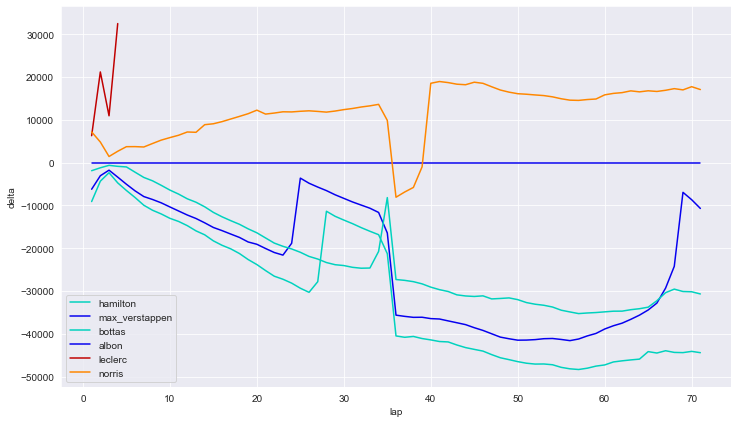

In [152]:
fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(
    data=delta_table,
    x='lap',
    y='delta',
    hue='driverRef',
    palette=get_driver_color_dict(raceId, key='ref'),
    ax=ax)
# seaborn specific remove legend title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])